## Q. Find publicly available data for key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA.

### DATASET PREPARATION

In [1]:
import pandas as pd #for analysis
pd.set_option("display.max_column",None)
import numpy as np #for wrangling
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization

In [3]:
df = pd.read_csv(r"C:\Users\jaisw\OneDrive\Desktop\US_HousePrice Prediction\CSUSHPISA.csv") #data file importation(target variable)

In [6]:
df.head()

,DATE,CSUSHPISA
0,01-01-2003,128.461
1,01-02-2003,129.355
2,01-03-2003,130.148
3,01-04-2003,130.884
4,01-05-2003,131.735


In [16]:
df['year'] = pd.DatetimeIndex(df['DATE']).year #new column created as 'year'

In [17]:
df

,DATE,CSUSHPISA,year
0,2003-01-01,128.461,2003
1,2003-01-02,129.355,2003
2,2003-01-03,130.148,2003
3,2003-01-04,130.884,2003
4,2003-01-05,131.735,2003
...,...,...,...
244,2023-01-05,302.566,2023
245,2023-01-06,304.593,2023
246,2023-01-07,306.767,2023
247,2023-01-08,309.155,2023


In [33]:
yearly_df=df.groupby(by='year', as_index=False).sum() #changing quarterly data in annually

In [34]:
yearly_df

,year,CSUSHPISA
0,2003,1604.776
1,2004,1805.283
2,2005,2060.844
3,2006,2201.370
4,2007,2159.027
5,2008,1968.689
6,2009,1782.541
7,2010,1736.094
8,2011,1671.114
9,2012,1691.926


In [25]:
df1=pd.read_csv('Final_Dataset.csv') #data file importation(features)

In [26]:
df1

,DATE,UNRATE,TTLCONS,PSAVERT,PERMIT1,PERMIT,HOUST1F,HSN1F,HNFSEPUSSA,MSACSR,INTDSRUSM193N,LFACTTTTUSM657S,NA000334Q,QUSR628BIS,RSAHORUSQ156S
0,01-01-2003,17.6,2574212,15.4,4132,5419,4237,2934,1020,12.6,6.75,0.658720,2743734.0,114.1698,68.1
1,01-04-2003,18.4,2607138,15.4,4241,5513,4278,3283,1026,11.5,6.50,0.706815,2831413.0,116.2112,68.2
2,01-07-2003,18.4,2704692,16.5,4532,5812,4574,3505,1038,10.9,6.00,-0.357552,2886905.0,118.9971,68.3
3,01-10-2003,17.5,2800208,15.0,4628,5917,4972,3366,1097,11.9,6.00,0.136154,2994399.0,122.8818,68.5
4,01-01-2004,17.1,2837497,13.7,4751,5984,4673,3600,1127,11.1,6.00,0.146620,2924602.0,125.9256,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,01-10-2022,10.8,5513579,9.7,2393,4366,2549,1795,1372,27.6,0.00,0.210951,6701519.0,157.5075,65.9
80,01-01-2023,10.5,5673162,14.3,2373,4273,2501,1914,1309,24.6,0.00,1.066342,6546655.0,157.7020,66.0
81,01-04-2023,10.7,5810796,15.3,2682,4354,2789,2072,1285,22.3,0.00,0.131928,6802375.0,157.8759,65.9
82,01-07-2023,11.1,5993866,12.1,2841,4455,2904,2109,1292,22.1,0.00,0.585114,6928858.0,NaN,66.0


In [30]:
df1['year'] = pd.DatetimeIndex(df1['DATE']).year #new column created as 'year'

In [35]:
yearly_df1=df1.groupby(by='year', as_index=False).sum()  #changing quarterly data in annually

In [36]:
yearly_df1

,year,UNRATE,TTLCONS,PSAVERT,PERMIT1,PERMIT,HOUST1F,HSN1F,HNFSEPUSSA,MSACSR,INTDSRUSM193N,LFACTTTTUSM657S,NA000334Q,QUSR628BIS,RSAHORUSQ156S
0,2003,71.9,10686250,62.3,17533,22661,18061,13088,4181,46.9,25.25,1.144138,11456451.0,472.2599,273.1
1,2004,66.5,11870640,55.8,19251,24691,19250,14410,4744,48.0,28.75,0.903912,12217197.0,525.1750,276.1
2,2005,61.0,13379224,27.0,20214,25921,20622,15347,5612,53.4,51.00,1.324043,13039198.0,588.6539,275.5
3,2006,55.3,13972110,33.3,16565,22124,17683,12592,6640,77.2,72.25,1.786842,13815583.0,603.2600,275.1
4,2007,55.4,13772900,30.3,11659,16698,12429,9224,6373,100.6,69.50,0.777354,14474231.0,552.5761,272.6
5,2008,69.6,12911075,49.6,6809,10750,7396,5786,5106,128.1,26.00,0.479300,14769864.0,455.0460,271.2
6,2009,111.4,10946916,68.8,5275,6984,5309,4491,3346,108.4,6.00,-1.000037,14478069.0,412.2424,269.4
7,2010,115.3,9738272,71.1,5376,7244,5657,3855,2536,96.0,8.75,0.355548,15048970.0,400.0159,267.3
8,2011,107.2,9486813,78.6,5040,7488,5212,3677,2008,79.0,9.00,0.225697,15599734.0,377.1245,264.5
9,2012,96.9,10242418,94.3,6236,9942,6444,4417,1750,57.1,9.00,1.056774,16253971.0,386.8835,261.9


In [37]:
#final dataset creation
final_df = pd.merge(yearly_df1, yearly_df, on ='year',how='inner') 
final_df

,year,UNRATE,TTLCONS,PSAVERT,PERMIT1,PERMIT,HOUST1F,HSN1F,HNFSEPUSSA,MSACSR,INTDSRUSM193N,LFACTTTTUSM657S,NA000334Q,QUSR628BIS,RSAHORUSQ156S,CSUSHPISA
0,2003,71.9,10686250,62.3,17533,22661,18061,13088,4181,46.9,25.25,1.144138,11456451.0,472.2599,273.1,1604.776
1,2004,66.5,11870640,55.8,19251,24691,19250,14410,4744,48.0,28.75,0.903912,12217197.0,525.1750,276.1,1805.283
2,2005,61.0,13379224,27.0,20214,25921,20622,15347,5612,53.4,51.00,1.324043,13039198.0,588.6539,275.5,2060.844
3,2006,55.3,13972110,33.3,16565,22124,17683,12592,6640,77.2,72.25,1.786842,13815583.0,603.2600,275.1,2201.370
4,2007,55.4,13772900,30.3,11659,16698,12429,9224,6373,100.6,69.50,0.777354,14474231.0,552.5761,272.6,2159.027
5,2008,69.6,12911075,49.6,6809,10750,7396,5786,5106,128.1,26.00,0.479300,14769864.0,455.0460,271.2,1968.689
6,2009,111.4,10946916,68.8,5275,6984,5309,4491,3346,108.4,6.00,-1.000037,14478069.0,412.2424,269.4,1782.541
7,2010,115.3,9738272,71.1,5376,7244,5657,3855,2536,96.0,8.75,0.355548,15048970.0,400.0159,267.3,1736.094
8,2011,107.2,9486813,78.6,5040,7488,5212,3677,2008,79.0,9.00,0.225697,15599734.0,377.1245,264.5,1671.114
9,2012,96.9,10242418,94.3,6236,9942,6444,4417,1750,57.1,9.00,1.056774,16253971.0,386.8835,261.9,1691.926


# EDA

In [40]:
final_df.columns

Index(['year', 'UNRATE', 'TTLCONS', 'PSAVERT', 'PERMIT1', 'PERMIT', 'HOUST1F',
       'HSN1F', 'HNFSEPUSSA', 'MSACSR', 'INTDSRUSM193N', 'LFACTTTTUSM657S',
       'NA000334Q', 'QUSR628BIS', 'RSAHORUSQ156S', 'CSUSHPISA'],
      dtype='object')

In [41]:
final_df.isnull().sum()

year               0
UNRATE             0
TTLCONS            0
PSAVERT            0
PERMIT1            0
PERMIT             0
HOUST1F            0
HSN1F              0
HNFSEPUSSA         0
MSACSR             0
INTDSRUSM193N      0
LFACTTTTUSM657S    0
NA000334Q          0
QUSR628BIS         0
RSAHORUSQ156S      0
CSUSHPISA          0
dtype: int64

###### no null valuue found

In [43]:
final_df.nunique()

year               21
UNRATE             21
TTLCONS            21
PSAVERT            21
PERMIT1            21
PERMIT             21
HOUST1F            21
HSN1F              21
HNFSEPUSSA         21
MSACSR             21
INTDSRUSM193N      17
LFACTTTTUSM657S    21
NA000334Q          21
QUSR628BIS         21
RSAHORUSQ156S      21
CSUSHPISA          21
dtype: int64

In [45]:
final_df.dtypes

year                 int64
UNRATE             float64
TTLCONS              int64
PSAVERT            float64
PERMIT1              int64
PERMIT               int64
HOUST1F              int64
HSN1F                int64
HNFSEPUSSA           int64
MSACSR             float64
INTDSRUSM193N      float64
LFACTTTTUSM657S    float64
NA000334Q          float64
QUSR628BIS         float64
RSAHORUSQ156S      float64
CSUSHPISA          float64
dtype: object

In [46]:
final_df.dtypes.value_counts()

float64    9
int64      7
dtype: int64

In [47]:
final_df.duplicated().sum()

0

###### No duplicate value found

In [48]:
data =final_df.copy() # copying dataset

# Data Visualization

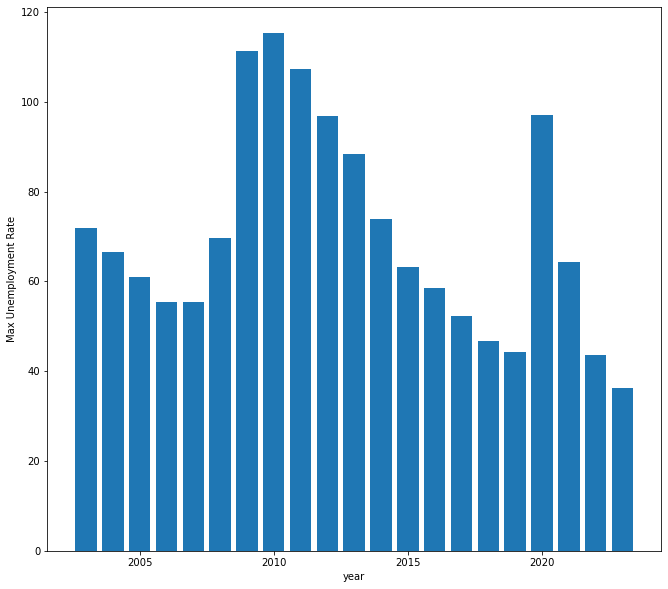

In [63]:
plt.figure(figsize=(11,10))
plt.bar(data.year,data.UNRATE)
plt.xlabel('year')
plt.ylabel('Max Unemployment Rate')
plt.show()

###### Highest unemployment rate found is 2010 and lowest in 2019 as per the data. Ignoring 2023 as it is only for three quarters.

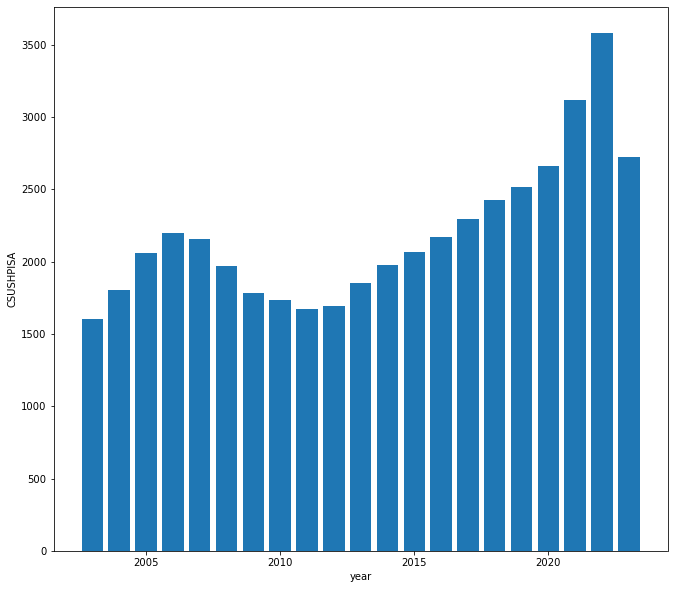

In [64]:
plt.figure(figsize=(11,10))
plt.bar(data.year,data.CSUSHPISA)
plt.xlabel('year')
plt.ylabel('CSUSHPISA')
plt.show()

###### I have found Highest Home Price Index in 2022 and the lowest was in 2003

In [65]:
data.corr()

,year,UNRATE,TTLCONS,PSAVERT,PERMIT1,PERMIT,HOUST1F,HSN1F,HNFSEPUSSA,MSACSR,INTDSRUSM193N,LFACTTTTUSM657S,NA000334Q,QUSR628BIS,RSAHORUSQ156S,CSUSHPISA
year,1.000000,-0.322915,0.762162,0.458725,-0.345795,-0.139222,-0.358032,-0.381785,-0.252861,-0.010462,-0.574768,-0.031172,0.958572,0.013479,-0.649244,0.762095
UNRATE,-0.322915,1.000000,-0.664806,0.366229,-0.443646,-0.589536,-0.456011,-0.412881,-0.562031,0.077371,-0.332072,-0.676748,-0.376476,-0.435317,0.367161,-0.577611
TTLCONS,0.762162,-0.664806,1.000000,0.208697,0.217473,0.414886,0.217260,0.188070,0.400370,0.062179,-0.146305,0.187193,0.829914,0.511553,-0.420528,0.977037
PSAVERT,0.458725,0.366229,0.208697,1.000000,-0.170674,-0.118529,-0.192571,-0.144455,-0.411091,-0.293807,-0.463449,-0.615096,0.432576,0.030419,0.005370,0.207022
PERMIT1,-0.345795,-0.443646,0.217473,-0.170674,1.000000,0.970459,0.998521,0.989289,0.673371,-0.462713,0.543873,0.319590,-0.228371,0.678290,0.320590,0.162136
PERMIT,-0.139222,-0.589536,0.414886,-0.118529,0.970459,1.000000,0.968468,0.945725,0.673984,-0.463910,0.464728,0.374585,-0.008184,0.750782,0.210459,0.361308
HOUST1F,-0.358032,-0.456011,0.217260,-0.192571,0.998521,0.968468,1.000000,0.989855,0.700122,-0.436688,0.575856,0.336261,-0.238555,0.685668,0.325048,0.161565
HSN1F,-0.381785,-0.412881,0.188070,-0.144455,0.989289,0.945725,0.989855,1.000000,0.698285,-0.433334,0.589944,0.238797,-0.278953,0.652663,0.331735,0.116045
HNFSEPUSSA,-0.252861,-0.562031,0.400370,-0.411091,0.673371,0.673984,0.700122,0.698285,1.000000,0.278416,0.712963,0.338775,-0.118249,0.666049,0.215361,0.365097
MSACSR,-0.010462,0.077371,0.062179,-0.293807,-0.462713,-0.463910,-0.436688,-0.433334,0.278416,1.000000,0.047944,-0.053681,0.041533,-0.064098,0.050387,0.127162


<AxesSubplot:>

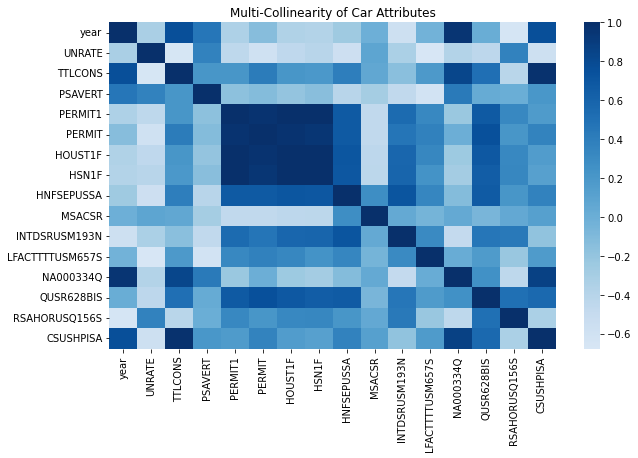

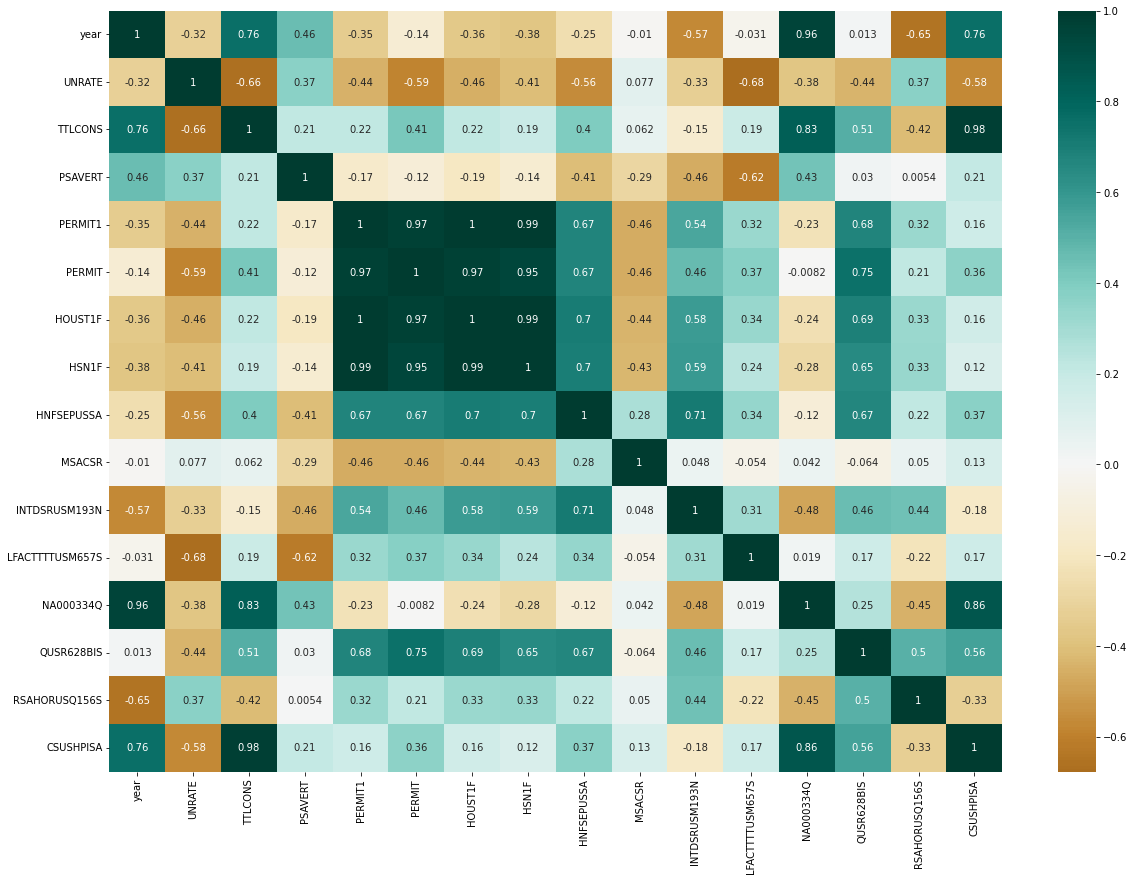

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), center=0, cmap='Blues') 
ax.set_title('Multi-Collinearity of Car Attributes') 
fig, ax = plt.subplots(figsize=(20,14)) 
sns.heatmap(data.corr(), center=0, cmap='BrBG', annot=True)

###### From the above correlation it can observed that factors like 'Total Construction(TTLCONS)' & 'GDP(NA000334Q)' have a strong impact on Home price. These factors have a +0.83: Strong monotonically increasing relationship.

Some key takeaway points from above heatmap are:

Unemplyment Rate : Highest measure 0.33 , Lowest measure -0.68, increasing unemployment  is a noted decrease in New projects.

GDP : Highest measure 0.96 , Lowest measure -0.48, 0.86 between Homes price and GDP. 


Permit : Highest measure 0.97 , Lowest measure -0.46


Total Constuctions : Highest measure 0.98 , Lowest measure -0.42

0.98 between House prices and Total Constuctions. Which tells us that if construction increase they create demand and that demand increses the asset value.


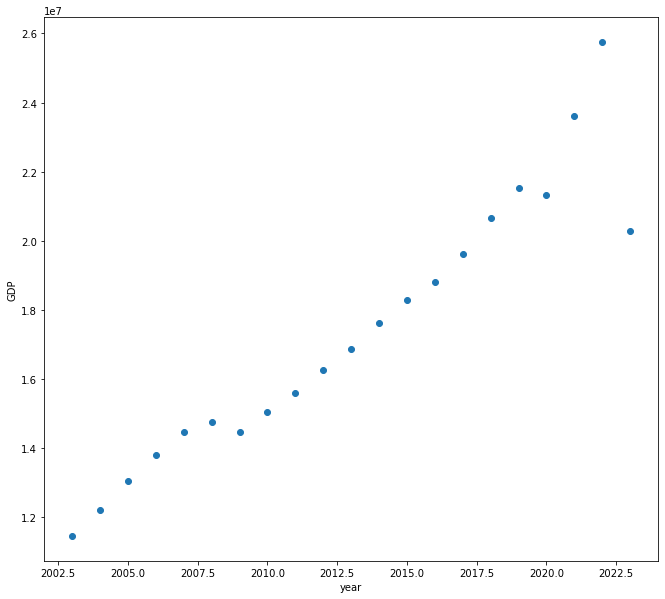

In [104]:
plt.figure(figsize=(11,10))
plt.bar(data.year,data.NA000334Q)
plt.xlabel('year')
plt.ylabel('GDP')
plt.show()

###### GDP of any country serves a very important part in growth of it's real estate market.
If the economy of a country is blooming then value for property is bound to see an apreciation.


C:\Users\jaisw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UNRATE'>

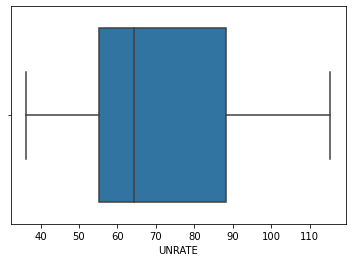

In [70]:
sns.boxplot(data['UNRATE'])

C:\Users\jaisw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaisw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaisw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaisw\anaconda3\lib\si

ValueError: num must be 1 <= num <= 12, not 13

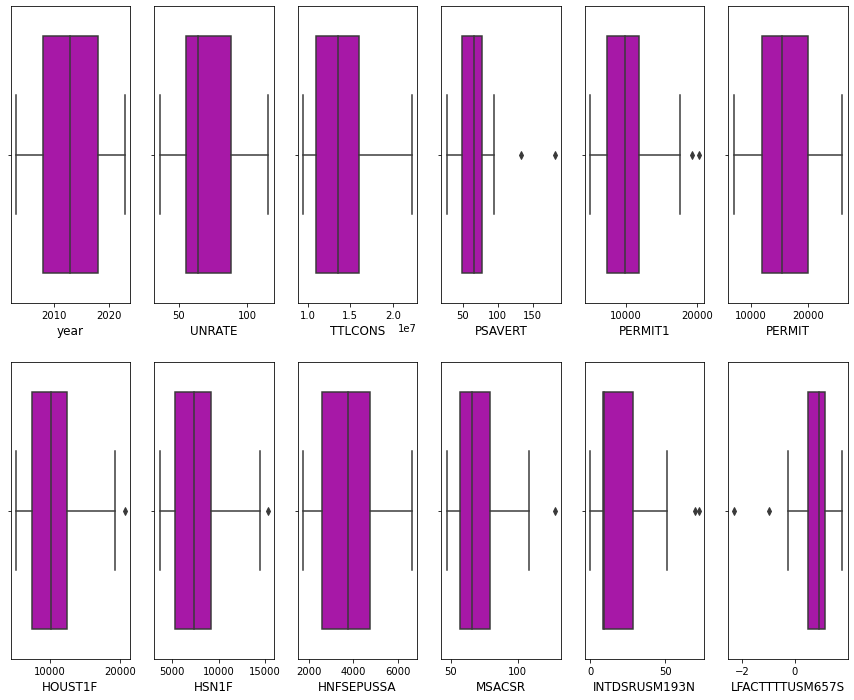

In [71]:
plt.figure(figsize=(15,12))
plotnumber=1
for col in data:
    if plotnumber<=18:
        ax=plt.subplot(2,6,plotnumber)
        sns.boxplot(data[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [72]:
data.skew()

year               0.000000
UNRATE             0.619028
TTLCONS            0.748491
PSAVERT            1.848160
PERMIT1            0.835446
PERMIT             0.150006
HOUST1F            0.802236
HSN1F              0.856621
HNFSEPUSSA         0.386343
MSACSR             1.019502
INTDSRUSM193N      1.450721
LFACTTTTUSM657S   -1.846295
NA000334Q          0.441799
QUSR628BIS        -0.010892
RSAHORUSQ156S     -3.159369
CSUSHPISA          1.282857
dtype: float64

In [73]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data)
x = pt.transform(data)
x = pd.DataFrame(x, columns=data.columns)
x.skew()

C:\Users\jaisw\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


year              -0.000975
UNRATE             0.016415
TTLCONS            0.000000
PSAVERT           -0.002749
PERMIT1            0.000000
PERMIT            -0.081637
HOUST1F            0.000000
HSN1F              0.000000
HNFSEPUSSA        -0.042250
MSACSR             0.074067
INTDSRUSM193N     -0.047096
LFACTTTTUSM657S   -0.125159
NA000334Q          0.000000
QUSR628BIS        -0.042277
RSAHORUSQ156S     -0.189564
CSUSHPISA          0.000000
dtype: float64

###### Standard Scaler

In [77]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_feature = pd.DataFrame(scaler.fit_transform(data.drop('CSUSHPISA', axis=1)), columns = data.drop('CSUSHPISA', axis=1).columns)
df_target = data['CSUSHPISA']

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variables"] = df_feature.columns
vif["VIF"] = [variance_inflation_factor(df_feature.values, i) for i in range(df_feature.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,Variables,VIF
0,year,2100.989171
4,PERMIT1,1847.036460
12,NA000334Q,1660.011048
6,HOUST1F,1595.020315
2,TTLCONS,1130.666826
5,PERMIT,870.630474
8,HNFSEPUSSA,734.771593
7,HSN1F,711.371130
14,RSAHORUSQ156S,424.375146
10,INTDSRUSM193N,163.876826


## Model Building

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [83]:
x=df_feature
y=df_target

In [85]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [87]:
print(X_train.shape)
print(X_test.shape)

(14, 15)
(7, 15)


In [88]:
#Linear regression model
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
scaled_X_train= pd.DataFrame(minmax.fit_transform(X_train),columns=X_train.columns)
scaled_X_test=pd.DataFrame(minmax.transform(X_test),columns=X_test.columns)
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()), ('model', LinearRegression())])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [ 99.62075437  10.72461994 313.31000066   4.65466493  29.11100252]


In [89]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9661310101297875

In [90]:
#RandomForestRegressor model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()), ('model', RandomForestRegressor()) ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [ 90.15315    105.13879333 784.65124     73.3572     120.850515  ]


In [91]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.7162122818505285

In [92]:
#GradientBoostingRegressor model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()), ('model', GradientBoostingRegressor())])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,cv=5, scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [ 65.84246544 110.28954686 729.0226244   34.06306385 148.78975659]


In [93]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.6327599967042193

In [105]:
y_pred

array([2837.74518071, 1751.73999531, 2465.61664475, 2820.01124288,
       2625.41777905, 2228.38397856, 2556.27683162])

In [106]:
!pip install -U notebook-as-pdf
!pyppeteer-install

[INFO] Starting Chromium download.

  0%|          | 0.00/137M [00:00<?, ?b/s]
  0%|          | 41.0k/137M [00:00<13:58, 163kb/s]
  0%|          | 81.9k/137M [00:00<15:30, 147kb/s]
  0%|          | 154k/137M [00:00<08:51, 257kb/s] 
  0%|          | 195k/137M [00:00<07:52, 289kb/s]
  0%|          | 246k/137M [00:00<06:50, 333kb/s]
  0%|          | 358k/137M [00:01<04:23, 518kb/s]
  0%|          | 512k/137M [00:01<02:56, 771kb/s]
  0%|          | 676k/137M [00:01<02:17, 990kb/s]
  1%|          | 901k/137M [00:01<01:42, 1.33Mb/s]
  1%|          | 1.25M/137M [00:01<01:12, 1.87Mb/s]
  1%|1         | 1.69M/137M [00:01<00:52, 2.57Mb/s]
  2%|1         | 2.15M/137M [00:01<00:42, 3.15Mb/s]
  2%|1         | 2.48M/137M [00:01<00:57, 2.32Mb/s]
  2%|2         | 2.75M/137M [00:02<01:18, 1.72Mb/s]
  2%|2         | 3.04M/137M [00:02<01:09, 1.93Mb/s]
  2%|2         | 3.29M/137M [00:02<01:05, 2.03Mb/s]
  3%|2         | 3.53M/137M [00:02<01:04, 2.06Mb/s]
  3%|2         | 3.90M/137M [00:02<00:54, 2.42Mb/s]